**Cargar paqueterías**

In [1]:
using DataFrames, CSV

In [2]:
using GLM

In [3]:
using Plots

In [4]:
pyplot()

Plots.PyPlotBackend()

In [5]:
using DSP

**Cargar datos**

In [6]:
Datos1=readtable("2014-06-JQRO_minuto_L1-F.csv");

In [7]:
Datos1

,Timestamp,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,WDir_Avg,WDir_SD,Rain_Tot,Press_Avg,Rad_Avg,Visibility
1,01/06/2014 00:00,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,01/06/2014 00:01,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
3,01/06/2014 00:02,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4,01/06/2014 00:03,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
5,01/06/2014 00:04,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
6,01/06/2014 00:05,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
7,01/06/2014 00:06,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
8,01/06/2014 00:07,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
9,01/06/2014 00:08,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
10,01/06/2014 00:09,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing


In [8]:
#Extraigo columnas de la tabla
Tiempo=Datos1[:, 1];
Temp=Datos1[:, 2];
VPViento=Datos1[:, 4];
DPViento=Datos1[:, 6];

In [9]:
#Modifico la variable de tiempo

#fecha = DateTime(Datos1[:,1],"d/m/y HH:MM")

Tiempo = DateTime[]
for i=1:length(Datos1[:,1])

    push!(Tiempo,DateTime(Datos1[i,1],"d/m/y HH:MM"))
    
end

In [10]:
Tiempo #Variable modificada

43200-element Array{DateTime,1}:
 2014-06-01T00:00:00
 2014-06-01T00:01:00
 2014-06-01T00:02:00
 2014-06-01T00:03:00
 2014-06-01T00:04:00
 2014-06-01T00:05:00
 2014-06-01T00:06:00
 2014-06-01T00:07:00
 2014-06-01T00:08:00
 2014-06-01T00:09:00
 2014-06-01T00:10:00
 2014-06-01T00:11:00
 2014-06-01T00:12:00
 ⋮                  
 2014-06-30T23:48:00
 2014-06-30T23:49:00
 2014-06-30T23:50:00
 2014-06-30T23:51:00
 2014-06-30T23:52:00
 2014-06-30T23:53:00
 2014-06-30T23:54:00
 2014-06-30T23:55:00
 2014-06-30T23:56:00
 2014-06-30T23:57:00
 2014-06-30T23:58:00
 2014-06-30T23:59:00

In [11]:
 #Omito missing
Temp1=collect(skipmissing(Temp));
VelViento=collect(skipmissing(VPViento));
Tiempo1=collect(skipmissing(Tiempo));
DirViento=collect(skipmissing(DPViento));

In [12]:
Temp1

6161-element Array{Float64,1}:
 34.35
 34.04
 32.46
 32.53
 32.6 
 32.62
 32.71
 32.66
 32.65
 32.55
 32.53
 32.62
 32.73
  ⋮   
 14.74
 14.79
 14.67
 14.72
 14.62
 14.7 
 14.62
 14.72
 14.72
 14.73
 14.71
 14.7 

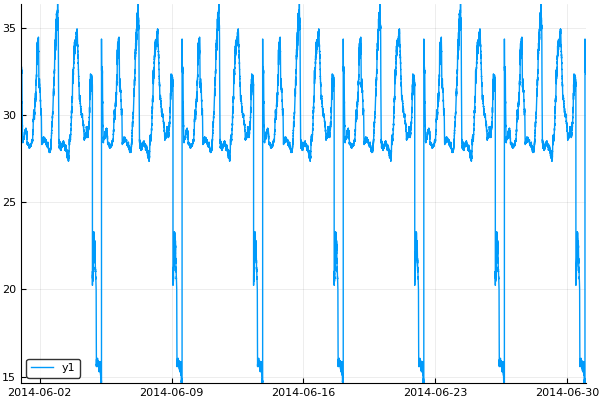

In [13]:
#plot Tiempo vs Temp
plot(Tiempo1, Temp1)

#x = [DateTime(2014,6,1):Dates.Hour(1):DateTime(2014,6,1,23);]
#majorformatter = matplotlib[:dates][:DateFormatter]("%Y.%m.%d")

#DateTime(Datos1[:,1],"d/m/y HH:MM")

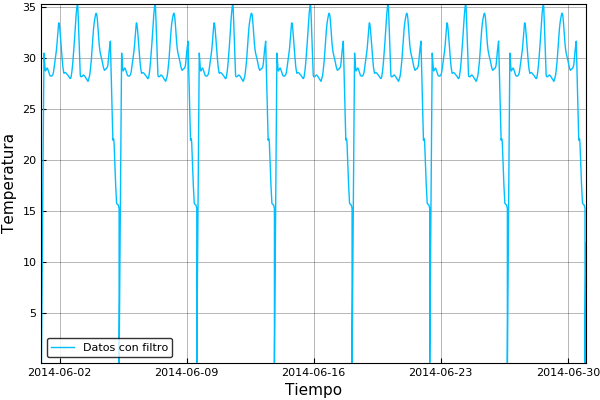

In [14]:
#Filtro media móvil
VT1=ones(200)*(1/200) #Ventana de tiempo
CVT1=filt(VT1,1,Temp1); #Convolución de datos y ventana de tiempo
#Gráfica
p2tt=plot(Tiempo,CVT1, label="Datos con filtro", ylab="Temperatura", box=:true, color="deepskyblue1", gridalpha=.4, grid=1.5, grid=:true, gridcolor="black", xlabel="Tiempo")

In [57]:
length(CVT1)/2

3080.5

In [65]:
F6=(floor(length(CVT1)/1 +1)/2)

3081.0

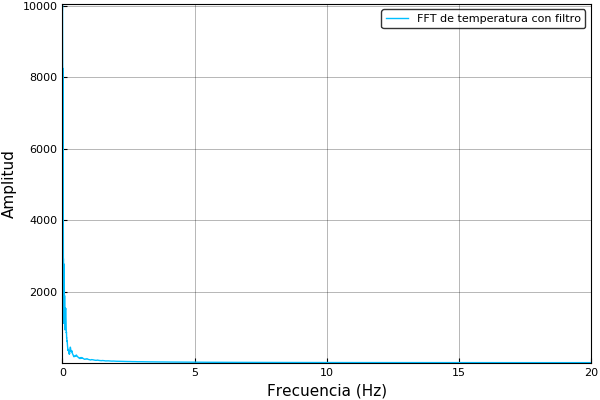

In [15]:
#Aplicando Fourier a los datos filtrados
ftt = abs.(fft(CVT1,1));
F6=(floor(length(ftt)/1 +1)/2)
fttp1 = ftt[2:convert(Int64,F6)]
fvec1t = collect(linspace(0,20,length(fttp1)))
p2Ft = plot(fvec1t,fttp1, ylab="Amplitud", xlabel="Frecuencia (Hz)", box=:true, label="FFT de temperatura con filtro", color="deepskyblue1", gridalpha=.4, grid=1.5, grid=:true, gridcolor="black")

In [60]:
floor(length(CVT1)/1 +1)

6162.0

In [27]:
spe1=spectrogram(Temp1,50,49,fs=40)

DSP.Periodograms.Spectrogram{Float64,DSP.Util.Frequencies}([1335.68 1332.81 … 271.157 271.12; 0.0111545 0.00305836 … 0.000932991 0.00102219; … ; 7.59606e-5 0.0023965 … 0.000169938 0.000151512; 4.805e-5 0.00105125 … 0.0001922 0.00016245], [0.0, 0.8, 1.6, 2.4, 3.2, 4.0, 4.8, 5.6, 6.4, 7.2  …  12.8, 13.6, 14.4, 15.2, 16.0, 16.8, 17.6, 18.4, 19.2, 20.0], 0.625:0.025:153.4)

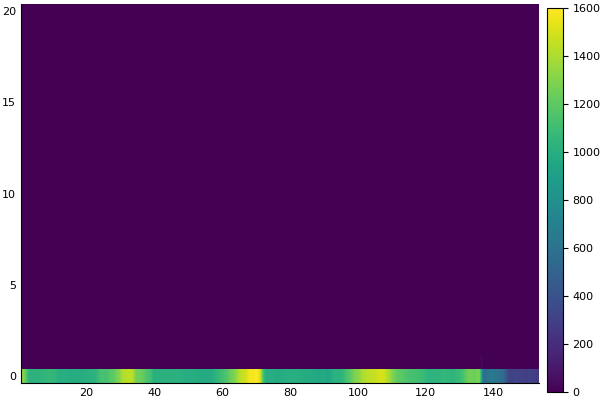

In [28]:
#Espectograma
fig1=heatmap(spe1.time,spe1.freq,spe1.power, color=:viridis)

**Ánalisis del viento**

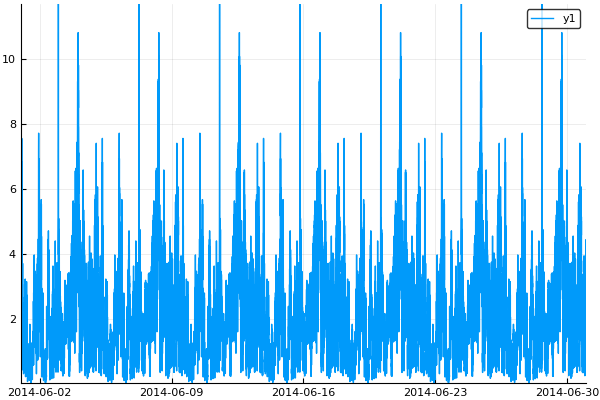

In [16]:
plot(Tiempo1, VelViento)


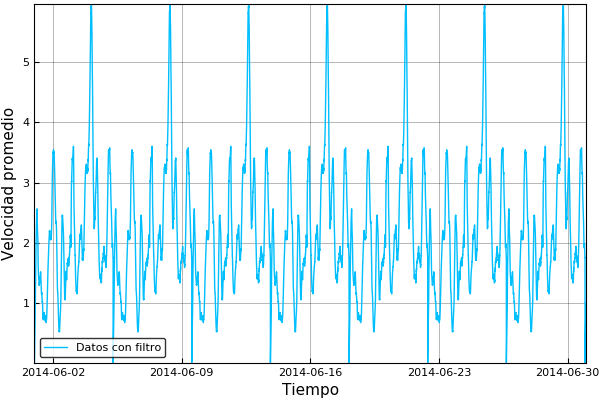

In [18]:
#Filtro media móvil
VT2=ones(200)*(1/200) #Ventana de tiempo
CVT2=filt(VT2,1,VelViento); #Convolución de datos y ventana de tiempo
#Gráfica
p2tt=plot(Tiempo1,CVT2, label="Datos con filtro", ylab="Velocidad promedio", box=:true, color="deepskyblue1", gridalpha=.4, grid=1.5, grid=:true, gridcolor="black", xlabel="Tiempo")

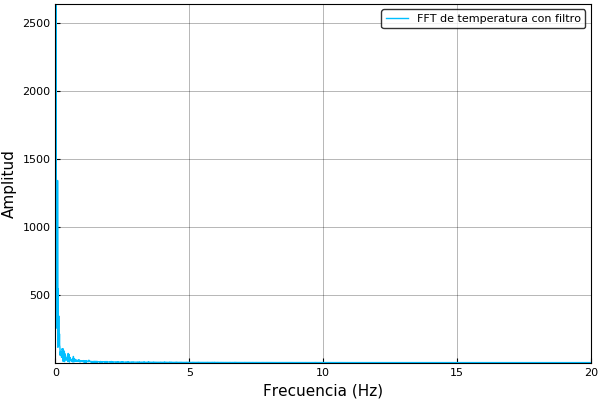

In [24]:
#Aplicando Fourier a los datos filtrados
ftt2 = abs.(fft(CVT2,1));
F6V=(floor(length(ftt2)/1 +1)/2)
fttp2 = ftt2[2:convert(Int64,F6)]
fvec2t = collect(linspace(0,20,length(fttp2)))
p2Ft = plot(fvec2t,fttp2, ylab="Amplitud", xlabel="Frecuencia (Hz)", box=:true, label="FFT de temperatura con filtro", color="deepskyblue1", gridalpha=.4, grid=1.5, grid=:true, gridcolor="black")


In [29]:
spe2=spectrogram(VelViento,50,49,fs=40)

DSP.Periodograms.Spectrogram{Float64,DSP.Util.Frequencies}([10.5169 10.4372 … 1.86111 1.71347; 0.00234157 0.00421915 … 0.308183 0.300984; … ; 0.00012829 0.00072416 … 0.00330986 0.000685817; 0.00198005 0.0010368 … 0.00356445 2.0e-5], [0.0, 0.8, 1.6, 2.4, 3.2, 4.0, 4.8, 5.6, 6.4, 7.2  …  12.8, 13.6, 14.4, 15.2, 16.0, 16.8, 17.6, 18.4, 19.2, 20.0], 0.625:0.025:153.4)

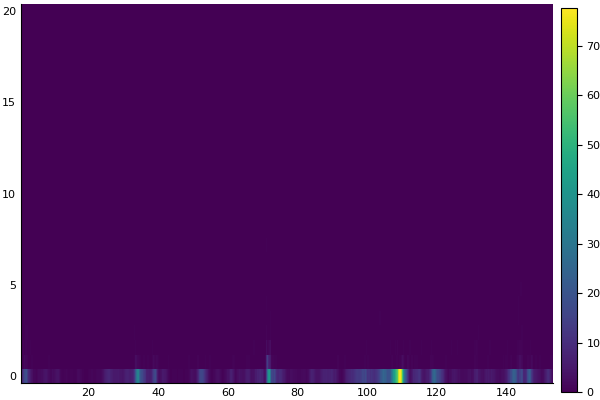

In [30]:
#Espectograma
fig1=heatmap(spe2.time,spe2.freq,spe2.power, color=:viridis)

In [26]:
#Rosa de los vientos mensual, solo con PyPlot

theta = DirViento #Dirección promedio del viento
r = VelViento #Vel prom del viento
width = 2pi/(length(theta))

fig = figure("pyplot_windrose_barplot",figsize=(10,10)) # Crea una nueva figura
ax = axes(polar="true") # Crea una gráfica polar
title("Rosa de los vientos, julio 2014")
b = bar(theta,r,width=width) # Gráfica de barras

dtheta = 20
ax[:set_thetagrids]([0:dtheta:360-dtheta;]) # Grid de 0 a 360 en incremento de theta
ax[:set_theta_zero_location]("N") # 0 grados en la parte superior
ax[:set_theta_direction](-1) # Sentido a las manecillas del reloj
fig[:canvas][:draw]() # Actualiza la figura

LoadError: [91mUndefVarError: figure not defined[39m

**Intentos**

In [62]:
#Transformada de Fourier

ft1=abs.(fft(Temp1,1))
#ftp1 = ft1[3080, :]
#fvec1 = collect(linspace(0.0,1.0,length(ftp1)))

#p1F = plot(fvec1,ftp1, ylab="Amplitud", title="Amplitud vs Frecuencia", box=:true, label="E-O", color="deepskyblue1", gridalpha=.4, grid=1.5, grid=:true, gridcolor="black")

6161-element Array{Float64,1}:
    1.7699e5
 8382.57    
 8743.18    
 7528.88    
 1728.22    
 8246.03    
 5031.0     
 3451.08    
 1833.26    
 2616.21    
 1568.42    
  981.663   
 2257.52    
    ⋮       
 2257.52    
  981.663   
 1568.42    
 2616.21    
 1833.26    
 3451.08    
 5031.0     
 8246.03    
 1728.22    
 7528.88    
 8743.18    
 8382.57    

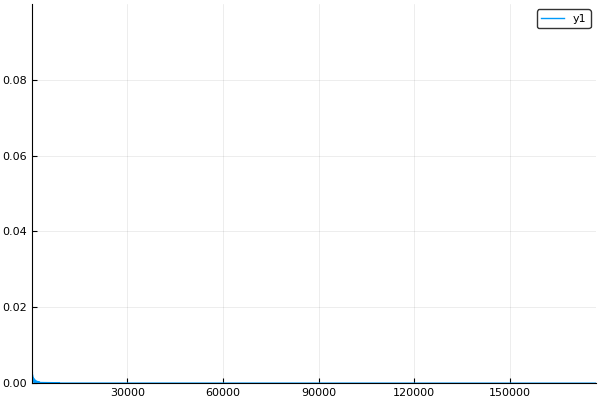

In [67]:


plot(ft1[1:4320], frecvec[1:4320])



In [56]:
?linspace

```
linspace(start, stop, n=50)
```

Construct a range of `n` linearly spaced elements from `start` to `stop`.

```jldoctest
julia> linspace(1.3,2.9,9)
1.3:0.2:2.9
```

```
linspace(c1::Color, c2::Color, n=100)
```

Generates `n`>2 colors in a linearly interpolated ramp from `c1` to`c2`, inclusive, returning an `Array` of colors.


search: linspace LinSpace



In [18]:
Tiempo[length(Tiempo)]-Tiempo[1]

2591940000 milliseconds

In [48]:
?linspace

search: linspace LinSpace


```
linspace(start, stop, n=50)
```

Construct a range of `n` linearly spaced elements from `start` to `stop`.

```jldoctest
julia> linspace(1.3,2.9,9)
1.3:0.2:2.9
```

```
linspace(c1::Color, c2::Color, n=100)
```

Generates `n`>2 colors in a linearly interpolated ramp from `c1` to`c2`, inclusive, returning an `Array` of colors.


In [17]:
2591940000*1.6667e-5 

43199.86398

In [18]:
length(Tiempo) #Total de datos

43200

In [19]:
#Frecuenca de muestreo
FM=43200/43200 #43200s

1.0

In [20]:
43200*1 #Total de muestras


43200

In [21]:
dt=1/43200 #dt

2.3148148148148147e-5

In [22]:
43200/1#Tiempo total de muestreo

43200.0

In [23]:
tp1=collect(linspace(0, length(Tiempo),length(Tiempo)));
Tt=tp1*dt; #Tiempo total

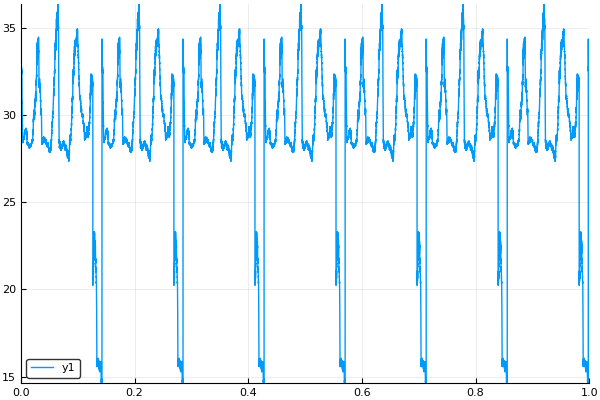

In [24]:
plot(Tt, Temp1)

In [1]:
length(Temp1)

LoadError: [91mUndefVarError: Temp1 not defined[39m

In [49]:
length(Tiempo) #43 200 muestras
             #1 frecuencia de muestreo
             #43 200 minutos de muestreo

43200

In [ ]:
nmin=43200 #Número de segundos
sps1=40 #Muestreo
fNy1=sps1/2;
frec1=10 #Frecuencia1
frec2=15 #Frecuencia2
tiempo1=collect(linspace(0,nsec,(nsec*sps1)));

In [ ]:
#y=Asen(2pi*f*t)
y1=sin.(2pi*frec1*tiempo1)
y2=sin.(2pi*frec2*tiempo1)
yt=(y1+y2);


In [22]:
Tiempo1=collect(skipmissing(Tiempo));

In [23]:
length(Tiempo1)

43200

In [25]:
ft1=fft(Tiempo1[43200 , 1])


LoadError: [91mMethodError: no method matching fft(::DateTime)[0m
Closest candidates are:
  fft([91m::AbstractArray{#s268,N} where N where #s268<:Real[39m) at dft.jl:204
  fft([91m::AbstractArray{#s267,N} where N where #s267<:Real[39m, [91m::Any[39m) at dft.jl:204
  fft([91m::AbstractArray{#s258,N} where N where #s258<:(Complex{#s257} where #s257<:Union{Integer, Rational})[39m) at dft.jl:206
  ...[39m

In [25]:
?fft

search: fft fft! FFTW fftfreq fftfilt fftshift fftintype fftouttype fftabs2type


```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`. The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along. Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `nextprod()`. See also `plan_fft()` for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$$
\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].
$$

A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

!!! note
      * Julia starts FFTW up with 1 thread by default. Higher performance is usually possible by increasing number of threads. Use `FFTW.set_num_threads(Sys.CPU_CORES)` to use as many threads as cores on your system.
      * This performs a multidimensional FFT by default. FFT libraries in other languages such as Python and Octave perform a one-dimensional FFT along the first non-singleton dimension of the array. This is worth noting while performing comparisons. For more details, refer to the [Noteworthy Differences from other Languages](@ref) section of the manual.



In [91]:
Temp11=Temp1[2:length(Temp1)]

6160-element Array{Float64,1}:
 34.04
 32.46
 32.53
 32.6 
 32.62
 32.71
 32.66
 32.65
 32.55
 32.53
 32.62
 32.73
 32.76
  ⋮   
 14.74
 14.79
 14.67
 14.72
 14.62
 14.7 
 14.62
 14.72
 14.72
 14.73
 14.71
 14.7 

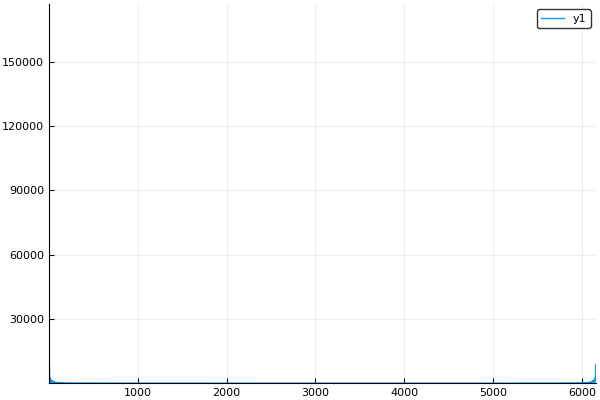

In [97]:
ft1 = abs.(fft(Temp11,1));
#ftp1 =(length(ft1)/2) #Para que no tome en cuenta el elemento 1
#fvec1 = collect(linspace(0,6161,length(ftp1)))


In [98]:
?xlims

```
xlims([plt])
```

Returns the x axis limits of the current plot or subplot


search: xlims xlims!



In [76]:
ft11=ft1[2:length(ft1)]

6160-element Array{Float64,1}:
 8382.57 
 8743.18 
 7528.88 
 1728.22 
 8246.03 
 5031.0  
 3451.08 
 1833.26 
 2616.21 
 1568.42 
  981.663
 2257.52 
 1169.96 
    ⋮    
 2257.52 
  981.663
 1568.42 
 2616.21 
 1833.26 
 3451.08 
 5031.0  
 8246.03 
 1728.22 
 7528.88 
 8743.18 
 8382.57 

In [83]:
6160/2

3080.0

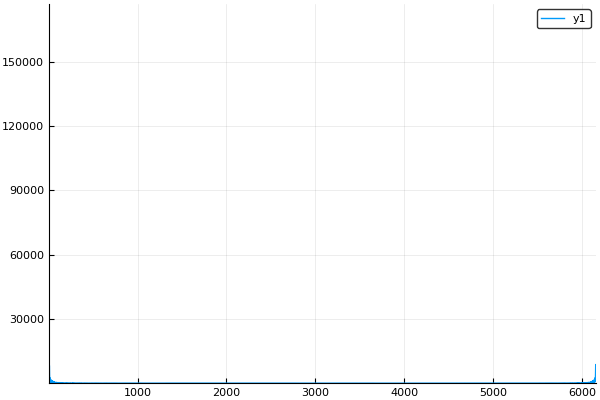

In [87]:
ft1 = abs.(fft(Temp1,1));
#ftp1 =(length(ft1)/2) #Para que no tome en cuenta el elemento 1

#frecvec=collect((linspace(0,sps,sps*seg)))
#length(frecvec)


plot(ft1)

In [43]:
ftp1*2

6161.0

In [28]:
Tiempo1

6161-element Array{Float64,1}:
 34.35
 34.04
 32.46
 32.53
 32.6 
 32.62
 32.71
 32.66
 32.65
 32.55
 32.53
 32.62
 32.73
  ⋮   
 14.74
 14.79
 14.67
 14.72
 14.62
 14.7 
 14.62
 14.72
 14.72
 14.73
 14.71
 14.7 

In [29]:
ft1 = abs.(fft(Tiempo1, 1)); #Transformada rápida de Fourier
ftp1 = ft1[2:convert(Int64,(length(ft1)/2))] #Para que no tome en cuenta el elemento 1
#fvec1 = collect(linspace(0,60,60))
#length(fvec1)
#plot(ft1)
#ffp1 = [(length(ft1)/2)] #Para que no tome en cuenta el elemento 1
#length(ffp1)
#ffvec1 = collect(linspace(0,1,length(ft1)));

plot(ft1, ftp1, ylab="Amplitud", title="Amplitud vs Frecuencia", box=:true, label="E-O", color="deepskyblue1", gridalpha=.4, grid=1.5, grid=:true, gridcolor="black")

LoadError: [91mInexactError()[39m

In [30]:
ft1


6161-element Array{Float64,1}:
    1.7699e5
 8382.57    
 8743.18    
 7528.88    
 1728.22    
 8246.03    
 5031.0     
 3451.08    
 1833.26    
 2616.21    
 1568.42    
  981.663   
 2257.52    
    ⋮       
 2257.52    
  981.663   
 1568.42    
 2616.21    
 1833.26    
 3451.08    
 5031.0     
 8246.03    
 1728.22    
 7528.88    
 8743.18    
 8382.57    